In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
CAPSM = pd.read_csv("/content/drive/MyDrive/Tp12Simu/ModeloComputacional/FDPs/msha_accident.csv", sep = ";", encoding = "latin1")

/tmp/ipython-input-4279448556.py:1: DtypeWarning: Columns (1,3,4,5,6,7,8,12,13,14,15,16,17,23,25,26,27,28,29,30,31,32,33,35,36,37,39,40,41,42,43,44,45,46,50,51,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  CAPSM = pd.read_csv("/content/drive/MyDrive/Tp12Simu/ModeloComputacional/FDPs/msha_accident.csv", sep = ";", encoding = "latin1")


In [29]:
type(CAPSM)

pandas.core.frame.DataFrame

In [30]:
CAPSM.shape

(1048575, 59)

In [31]:
CAPSM.head(10)

,mine_id,cntctr_id,subunit_cd,subunit_desc,ai_dt,inj_degr_desc,ai_class_desc,ai_occ_desc,ai_acty_desc,exper_tot_calc,...,days_lost,trans_term,return_to_work_dt,immed_notify_cd,immed_notify,invest_begin_dt,closed_doc_no,coal_metal_ind,load_dt,ai_year
0,4407259.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",17/11/2025,DAYS AWAY FROM WORK ONLY,OTHER,"Dry screening plant operator, Screen house ope...","Surface equipment, NEC",3.0,...,4.0,N,24/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",M,2025-11-29 00:35:59 EST,2025.0
1,1200063.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",11/11/2025,DAYS RESTRICTED ACTIVITY ONLY,POWERED HAULAGE,"Ledgeman/hand, Quarry man","Utility truck, Water trucks",3.0,...,0.0,N,18/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",M,2025-11-29 00:35:58 EST,2025.0
2,2003454.0,NaN,1.0,UNDERGROUND,11/11/2025,DAYS AWAY FROM WORK ONLY,SLIP OR FALL OF PERSON,"Miner, NEC",Inspect equipment or mine,0.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:03 EST,2025.0
3,101401.0,NaN,1.0,UNDERGROUND,10/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Laborer, Bull gang, Faceman, Parts runner, Rou...",Handling supplies or material,1.0,...,5.0,N,16/11/2025,?,NO VALUE FOUND,NaN,"3,20253E+11",C,2025-11-29 00:36:03 EST,2025.0
4,4200079.0,NaN,2.0,SURFACE AT UNDERGROUND,10/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Belt foreman, Maintenance foreman, Maintenance...",Handling supplies or material,25.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,C,2025-11-29 00:36:14 EST,2025.0
5,4609111.0,NaN,1.0,UNDERGROUND,8/11/2025,FATALITY,INUNDATION,"Bull gang foreman, Labor foreman, Leadman, Sec...",Supervise,19.0,...,NaN,NaN,NaN,4,INNUMDATION,8/11/2025,NaN,C,2025-11-29 00:36:09 EST,2025.0
6,3102191.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",6/11/2025,DAYS AWAY FROM WORK ONLY,HANDLING OF MATERIALS,"Dry screening plant operator, Screen house ope...",Machine maintenance,0.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:13 EST,2025.0
7,4609028.0,NaN,1.0,UNDERGROUND,6/11/2025,FATALITY,POWERED HAULAGE,"Scoop tram operator, Load/Haul/Dump operator",Load-haul-dump (UG),4.0,...,0.0,N,NaN,1,DEATH,6/11/2025,NaN,C,2025-11-29 00:36:02 EST,2025.0
8,502666.0,NaN,3.0,"STRIP, QUARY, OPEN PIT",31/10/2025,DAYS AWAY FROM WORK ONLY,HANDTOOLS (NONPOWERED),"Ledgeman/hand, Quarry man",Hand tools (not powered),2.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:13 EST,2025.0
9,4100298.0,NaN,30.0,MILL OPERATION/PREPARATION PLANT,31/10/2025,DAYS AWAY FROM WORK ONLY,SLIP OR FALL OF PERSON,"Electrician, Lineman","Walking, Running",26.0,...,NaN,NaN,NaN,?,NO VALUE FOUND,NaN,NaN,M,2025-11-29 00:36:14 EST,2025.0


In [32]:
CAPSM.dtypes

,0
mine_id,float64
cntctr_id,object
subunit_cd,float64
subunit_desc,object
ai_dt,object
inj_degr_desc,object
ai_class_desc,object
ai_occ_desc,object
ai_acty_desc,object
exper_tot_calc,float64


In [33]:
CAPSM['ai_dt'] = pd.to_datetime(CAPSM['ai_dt'], dayfirst=True)
CAPSM['semana'] = CAPSM['ai_dt'].dt.isocalendar().week
CAPSM['anio'] = CAPSM['ai_dt'].dt.isocalendar().year
APS = CAPSM[(CAPSM.coal_metal_ind == 'M') & (CAPSM.anio >= 2015)][['anio','semana','coal_metal_ind']].groupby(['anio','semana']).count()
APS

coal_metal_ind
anio semana                
2015 1                   52
     2                  121
     3                  109
     4                   83
     5                   88
...                     ...
2025 43                   1
     44                   4
     45                   1
     46                   2
     47                   1

[569 rows x 1 columns]

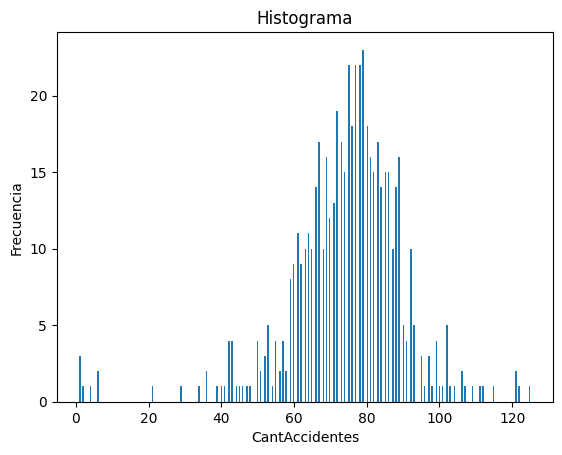

In [34]:
plt.title("Histograma")
plt.xlabel("CantAccidentes")
plt.ylabel("Frecuencia")
plt.hist(APS, bins=300)
plt.show()

In [35]:
pip install fitter

In [36]:
from fitter import Fitter

In [37]:
f = Fitter(APS)

In [38]:
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
johnsonsu,0.003375,1210.141108,1227.516629,inf,0.027290,0.779829
genhyperbolic,0.003385,1211.803786,1233.523188,inf,0.028951,0.715514
norminvgauss,0.003399,1203.951315,1221.326837,inf,0.027928,0.755538
mielke,0.003420,1238.591964,1255.967486,inf,0.033092,0.550263
genlogistic,0.003426,1233.607357,1246.638998,inf,0.035012,0.477455
burr,0.003450,1273.527678,1290.903200,inf,0.044346,0.206893
laplace_asymmetric,0.003461,1195.700239,1208.731880,inf,0.036874,0.411644
dgamma,0.003485,1230.442328,1243.473970,inf,0.050296,0.108627
t,0.003517,1224.491755,1237.523396,inf,0.038351,0.363422
hypsecant,0.003539,1240.104586,1248.792346,inf,0.049287,0.121863


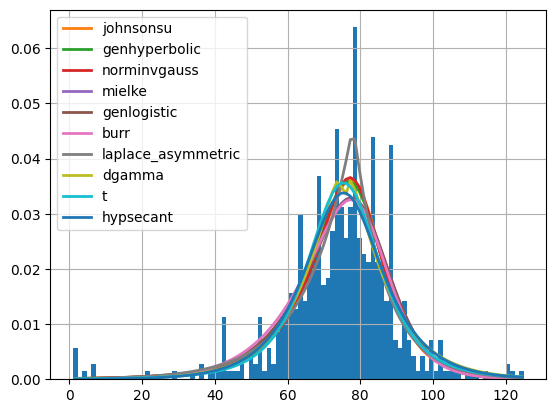

In [39]:
f.summary(10)

In [40]:
f.get_best(method='sumsquare_error')

{'johnsonsu': {'a': 0.366308266363123,
  'b': 1.2863317264123912,
  'loc': 79.77858636796023,
  'scale': 13.852446969708332}}